In [1]:
import pandas as pd
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)
pd.set_option("display.width", 10000)

def load_priorband_data():
    df = pd.read_parquet("data_for_anton.parquet")
    df=df.reset_index()
    df_collection=[]
    for seed_nr in range(50):
        partial_df=df[["benchmark","prior","algorithm","used_fidelity"]]
        partial_df["value"]=df[f"seed-{seed_nr}"]
        partial_df["seed"]=seed_nr
        df_collection.append(partial_df)
        print(f"Seed {seed_nr+1}/50", end="\r", flush=True)
    return pd.concat(df_collection,ignore_index=True)

df=load_priorband_data()

In [2]:
rs_hb_pb=["random_search","hyperband","pb_mutation_dynamic_geometric-default-at-target"]
df_dict={"all":{"all":df}}
df_dict={"all":{"RS+HB+PB":df.loc[(df["algorithm"].isin(rs_hb_pb))]}}
df_dict={"good+bad":{"all":df.loc[(df["prior"]=="good")|(df["prior"]=="bad")]}}
df_dict["good+bad"]["RS+HB+PB"]=df.loc[((df["prior"]=="good")|(df["prior"]=="bad"))&(df["algorithm"].isin(rs_hb_pb))]
for priortype in df["prior"].unique():
    df_dict[priortype]={}
    df_dict[priortype]["all"]=df.loc[df["prior"]==priortype]
    df_dict[priortype]["RS+HB+PB"]=df.loc[(df["prior"]==priortype)&((df["algorithm"].isin(rs_hb_pb)))]

Random Search vs. HyperBand vs. PriorBand on Prior: good+bad 

Bins: [ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13.  14.2 15.4 16.6
 17.8 19.  20.2 21.4 22.6 23.8 25. ]
P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the algorithm and the used_fidelity describes the data as well as the one that does. Therefore there is significant difference within algorithm and the used_fidelity.

P-values adjusted by tukey method for family of 3 estimates
        algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE      DF
1   random_search            1.0_2.2     2.412  -1.083    5.906  1.649  16.111
2       hyperband            1.0_2.2     3.388  -0.103    6.880  1.647  16.028
3       priorband            1.0_2.2     7.526   4.035   11.017  1.647  16.013
4   random_search            2.2_3.4     1.886  -1.613    5.384  1.652  16.227
5       hyperband            2.2_3.4     2.400  -1.093    5.893  1.648  1

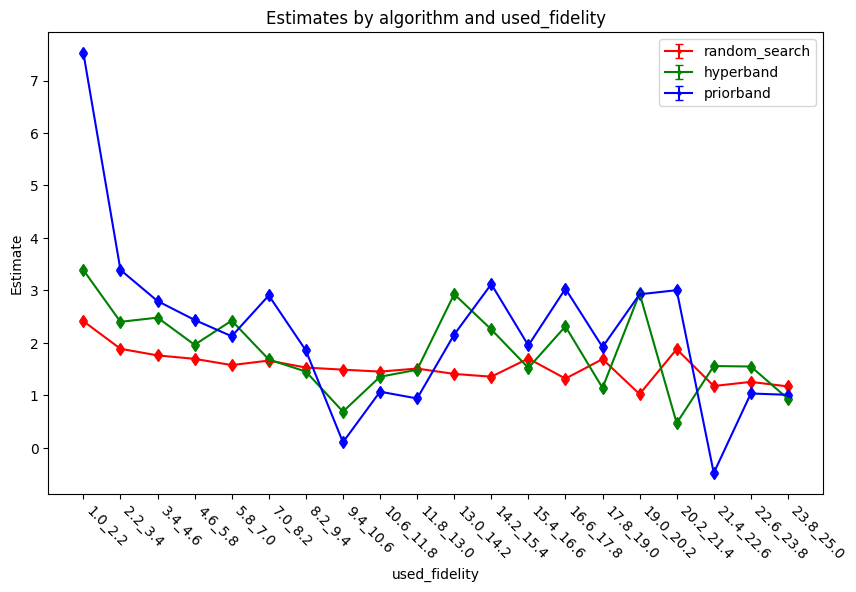

Random Search vs. HyperBand vs. PriorBand on Prior: good 

Bins: [ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13.  14.2 15.4 16.6
 17.8 19.  20.2 21.4 22.6 23.8 25. ]
P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the algorithm and the used_fidelity describes the data as well as the one that does. Therefore there is significant difference within algorithm and the used_fidelity.

P-values adjusted by tukey method for family of 3 estimates
        algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE     DF
1   random_search            1.0_2.2    -0.053  -1.008    0.901  0.414  8.033
2       hyperband            1.0_2.2     0.335  -0.620    1.289  0.414  8.009
3       priorband            1.0_2.2    -0.740  -1.695    0.216  0.416  8.138
4   random_search            2.2_3.4    -0.298  -1.253    0.657  0.415  8.068
5       hyperband            2.2_3.4    -0.431  -1.385    0.524  0.414  8.025
6   

c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\pandas\core\internals\blocks.py:1491: RuntimeWarning: invalid value encountered in multiply
  values = self.values.round(decimals)  # type: ignore[union-attr]


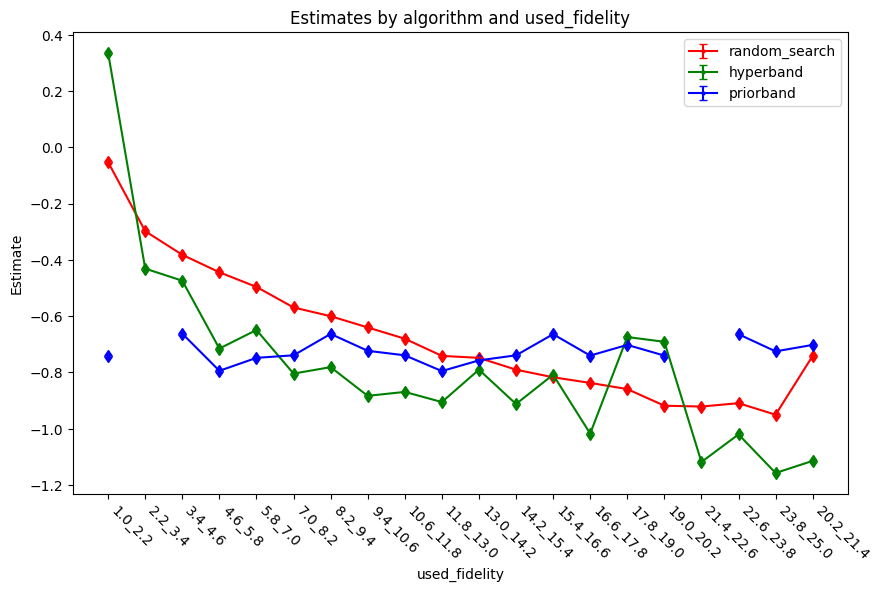

Random Search vs. HyperBand vs. PriorBand on Prior: bad 

Bins: [ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13.  14.2 15.4 16.6
 17.8 19.  20.2 21.4 22.6 23.8 25. ]
P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the algorithm and the used_fidelity describes the data as well as the one that does. Therefore there is significant difference within algorithm and the used_fidelity.

P-values adjusted by tukey method for family of 3 estimates
        algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE      DF
1   random_search            1.0_2.2     2.222  -1.291    5.736  1.659  16.215
2       hyperband            1.0_2.2     3.501  -0.007    7.009  1.655  16.058
3       priorband            1.0_2.2     7.637   4.130   11.143  1.654  16.020
4   random_search            2.2_3.4     1.556  -1.966    5.078  1.665  16.435
5       hyperband            2.2_3.4     2.391  -1.119    5.902  1.657  16.120

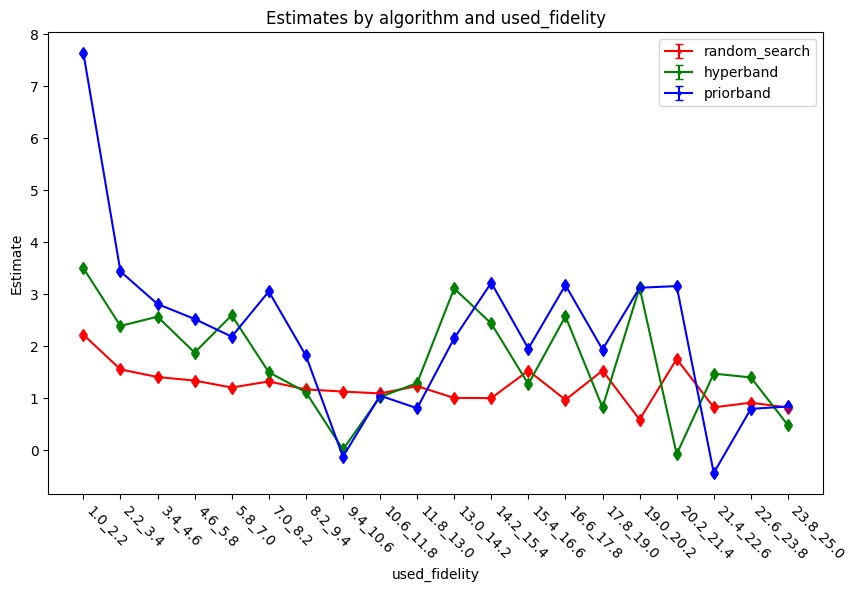

In [4]:
from significance_analysis import conduct_analysis

result_dict={}
for priortype in ["good+bad","good","bad"]:
    print(f"Random Search vs. HyperBand vs. PriorBand on Prior: {priortype} \n")
    df_dict[priortype]["RS+HB+PB"].loc[df_dict[priortype]["RS+HB+PB"]["algorithm"]=='pb_mutation_dynamic_geometric-default-at-target',"algorithm"]="priorband"
    # result_dict[priortype]=conduct_analysis(df_dict[priortype]["RS+HB+PB"],"value","algorithm","benchmark",show_plots=False)
    result_dict[priortype]=conduct_analysis(df_dict[priortype]["RS+HB+PB"].loc[(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]>=1)&(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]<=25)],"value","algorithm","benchmark",continuous_fidelity=False,show_plots=True,bin_id="used_fidelity",bins=20)


#Also do for prior as budget